<h1>Fitness Recommendation System using Content-Based Filtering </h1>

<img src="C:\Users\Nonsindiso\Downloads\bruce-mars-gJtDg6WfMlQ-unsplash.jpg" width="600" height="400" />

<h2>Data Loading and Cleaning</h2>

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import plotly.express as px
import plotly.graph_objects as go



In [3]:
df = pd.read_excel(r"C:\Users\Nonsindiso\Downloads\gym recommendation.xlsx")


In [4]:
df.head()

,ID,Sex,Age,Height,Weight,Hypertension,Diabetes,BMI,Level,Fitness Goal,Fitness Type,Exercises,Equipment,Diet,Recommendation
0,1,Male,18,1.68,47.5,No,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...",Dumbbells and barbells,"Vegetables: (Carrots, Sweet Potato, and Lettuc...",Follow a regular exercise schedule. Adhere to ...
1,2,Male,18,1.68,47.5,Yes,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...","Light athletic shoes, resistance bands, and li...","Vegetables: (Tomatoes, Garlic, leafy greens, b...",Follow a regular exercise schedule. Adhere to ...
2,3,Male,18,1.68,47.5,No,Yes,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Dumbbells, barbells and Blood glucose monitor","Vegetables: (Garlic, Roma Tomatoes, Capers and...",Follow a regular exercise schedule. Adhere to ...
3,4,Male,18,1.68,47.5,Yes,Yes,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Light athletic shoes, resistance bands, light ...","Vegetables: (Garlic, Roma Tomatoes, Capers, Gr...",Follow a regular exercise schedule. Adhere to ...
4,5,Male,18,1.68,47.5,No,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...",Dumbbells and barbells,"Vegetables: (Carrots, Sweet Potato, Lettuce); ...",Follow a regular exercise schedule. Adhere to ...


In [5]:
df.shape

(14589, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14589 entries, 0 to 14588
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              14589 non-null  int64  
 1   Sex             14589 non-null  object 
 2   Age             14589 non-null  int64  
 3   Height          14589 non-null  float64
 4   Weight          14589 non-null  float64
 5   Hypertension    14589 non-null  object 
 6   Diabetes        14589 non-null  object 
 7   BMI             14589 non-null  float64
 8   Level           14589 non-null  object 
 9   Fitness Goal    14589 non-null  object 
 10  Fitness Type    14589 non-null  object 
 11  Exercises       14589 non-null  object 
 12  Equipment       14589 non-null  object 
 13  Diet            14589 non-null  object 
 14  Recommendation  14589 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 1.7+ MB


In [7]:
df.drop(columns=["ID"], inplace = True)

In [8]:
df.head()

,Sex,Age,Height,Weight,Hypertension,Diabetes,BMI,Level,Fitness Goal,Fitness Type,Exercises,Equipment,Diet,Recommendation
0,Male,18,1.68,47.5,No,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...",Dumbbells and barbells,"Vegetables: (Carrots, Sweet Potato, and Lettuc...",Follow a regular exercise schedule. Adhere to ...
1,Male,18,1.68,47.5,Yes,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...","Light athletic shoes, resistance bands, and li...","Vegetables: (Tomatoes, Garlic, leafy greens, b...",Follow a regular exercise schedule. Adhere to ...
2,Male,18,1.68,47.5,No,Yes,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Dumbbells, barbells and Blood glucose monitor","Vegetables: (Garlic, Roma Tomatoes, Capers and...",Follow a regular exercise schedule. Adhere to ...
3,Male,18,1.68,47.5,Yes,Yes,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Light athletic shoes, resistance bands, light ...","Vegetables: (Garlic, Roma Tomatoes, Capers, Gr...",Follow a regular exercise schedule. Adhere to ...
4,Male,18,1.68,47.5,No,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...",Dumbbells and barbells,"Vegetables: (Carrots, Sweet Potato, Lettuce); ...",Follow a regular exercise schedule. Adhere to ...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14589 entries, 0 to 14588
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             14589 non-null  object 
 1   Age             14589 non-null  int64  
 2   Height          14589 non-null  float64
 3   Weight          14589 non-null  float64
 4   Hypertension    14589 non-null  object 
 5   Diabetes        14589 non-null  object 
 6   BMI             14589 non-null  float64
 7   Level           14589 non-null  object 
 8   Fitness Goal    14589 non-null  object 
 9   Fitness Type    14589 non-null  object 
 10  Exercises       14589 non-null  object 
 11  Equipment       14589 non-null  object 
 12  Diet            14589 non-null  object 
 13  Recommendation  14589 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 1.6+ MB


In [10]:
df.shape

(14589, 14)

<h2>Label Encoding</h2>

In [11]:
# Label Encoding categorical columns
label_enc = LabelEncoder()
for col in ['Sex', 'Hypertension', 'Diabetes', 'Level' ,'Fitness Goal', 'Fitness Type']:
    df[col] = label_enc.fit_transform(df[col])
     

In [12]:
df.head()

,Sex,Age,Height,Weight,Hypertension,Diabetes,BMI,Level,Fitness Goal,Fitness Type,Exercises,Equipment,Diet,Recommendation
0,1,18,1.68,47.5,0,0,16.83,3,0,1,"Squats, deadlifts, bench presses, and overhead...",Dumbbells and barbells,"Vegetables: (Carrots, Sweet Potato, and Lettuc...",Follow a regular exercise schedule. Adhere to ...
1,1,18,1.68,47.5,1,0,16.83,3,0,1,"Squats, deadlifts, bench presses, and overhead...","Light athletic shoes, resistance bands, and li...","Vegetables: (Tomatoes, Garlic, leafy greens, b...",Follow a regular exercise schedule. Adhere to ...
2,1,18,1.68,47.5,0,1,16.83,3,0,1,"Squats, yoga, deadlifts, bench presses, and ov...","Dumbbells, barbells and Blood glucose monitor","Vegetables: (Garlic, Roma Tomatoes, Capers and...",Follow a regular exercise schedule. Adhere to ...
3,1,18,1.68,47.5,1,1,16.83,3,0,1,"Squats, yoga, deadlifts, bench presses, and ov...","Light athletic shoes, resistance bands, light ...","Vegetables: (Garlic, Roma Tomatoes, Capers, Gr...",Follow a regular exercise schedule. Adhere to ...
4,1,18,1.68,47.5,0,0,16.83,3,0,1,"Squats, deadlifts, bench presses, and overhead...",Dumbbells and barbells,"Vegetables: (Carrots, Sweet Potato, Lettuce); ...",Follow a regular exercise schedule. Adhere to ...


<h2>Normalization</h2>

In [13]:
#normalize numerical features
scaler = StandardScaler()
df[['Age', 'Height', 'Weight','BMI']] = scaler.fit_transform(df[['Age', 'Height', 'Weight','BMI']])


In [14]:
df.head()

,Sex,Age,Height,Weight,Hypertension,Diabetes,BMI,Level,Fitness Goal,Fitness Type,Exercises,Equipment,Diet,Recommendation
0,1,-1.63391,-0.202298,-1.14858,0,0,-1.121606,3,0,1,"Squats, deadlifts, bench presses, and overhead...",Dumbbells and barbells,"Vegetables: (Carrots, Sweet Potato, and Lettuc...",Follow a regular exercise schedule. Adhere to ...
1,1,-1.63391,-0.202298,-1.14858,1,0,-1.121606,3,0,1,"Squats, deadlifts, bench presses, and overhead...","Light athletic shoes, resistance bands, and li...","Vegetables: (Tomatoes, Garlic, leafy greens, b...",Follow a regular exercise schedule. Adhere to ...
2,1,-1.63391,-0.202298,-1.14858,0,1,-1.121606,3,0,1,"Squats, yoga, deadlifts, bench presses, and ov...","Dumbbells, barbells and Blood glucose monitor","Vegetables: (Garlic, Roma Tomatoes, Capers and...",Follow a regular exercise schedule. Adhere to ...
3,1,-1.63391,-0.202298,-1.14858,1,1,-1.121606,3,0,1,"Squats, yoga, deadlifts, bench presses, and ov...","Light athletic shoes, resistance bands, light ...","Vegetables: (Garlic, Roma Tomatoes, Capers, Gr...",Follow a regular exercise schedule. Adhere to ...
4,1,-1.63391,-0.202298,-1.14858,0,0,-1.121606,3,0,1,"Squats, deadlifts, bench presses, and overhead...",Dumbbells and barbells,"Vegetables: (Carrots, Sweet Potato, Lettuce); ...",Follow a regular exercise schedule. Adhere to ...


<h1>Visualisations</h1>

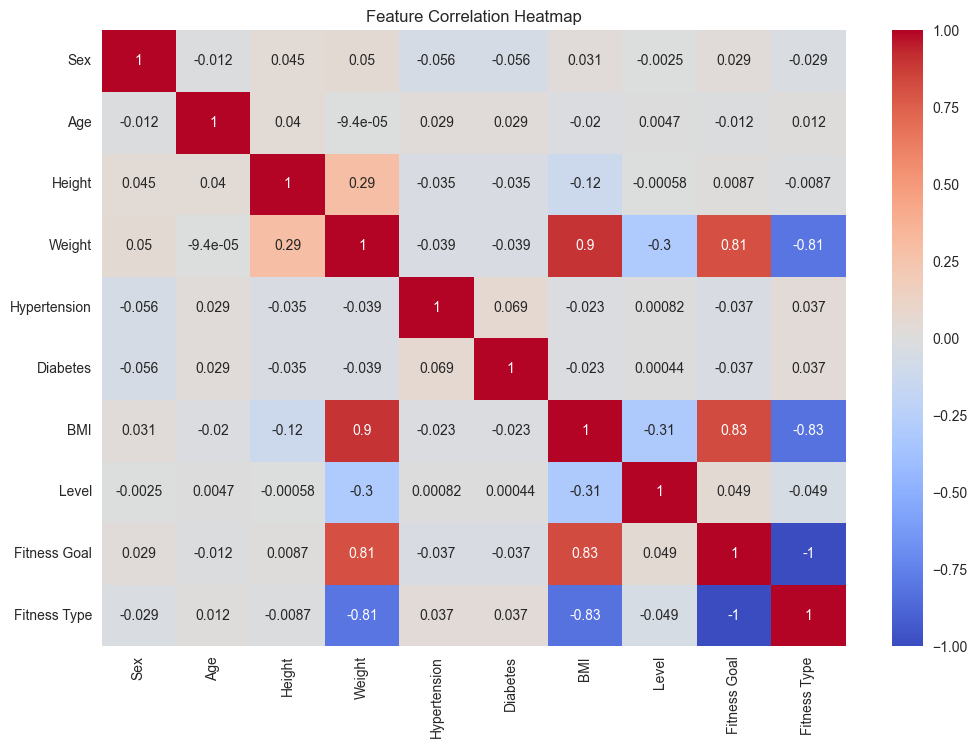

In [25]:
# Visualization 1: Correlation Heatmap
plt.figure(figsize=(12, 8))
# Calculate correlation matrix for numerical and encoded categorical features
corr_matrix = df[['Sex', 'Age', 'Height', 'Weight', 'Hypertension', 'Diabetes', 'BMI', 
                  'Level', 'Fitness Goal', 'Fitness Type']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

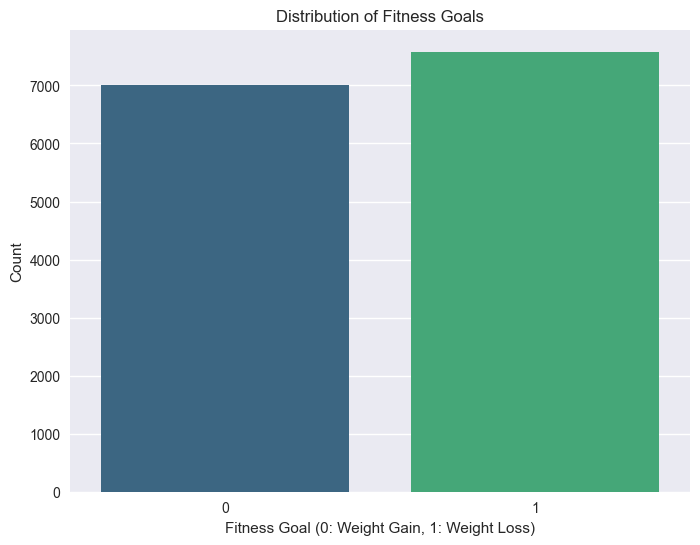

In [26]:
# Visualization 2: Fitness Goal Distribution
plt.figure(figsize=(8, 6))
goal_counts = df['Fitness Goal'].value_counts()
sns.barplot(x=goal_counts.index, y=goal_counts.values, palette='viridis')
plt.title('Distribution of Fitness Goals')
plt.xlabel('Fitness Goal (0: Weight Gain, 1: Weight Loss)')
plt.ylabel('Count')
plt.show()

<h2> RECOMMENDATION, FEEDBACK & EVALUATION.</h2>

In [14]:
def get_recommendation(top_n=3):
    print("Please enter your details for a personalized workout and diet recommendation.")
    user_input = {
        'Sex': int(input("Enter Sex (Male : 1/Female : 0): ")),
        'Age': float(input("Enter Age: ")),
        'Height': float(input("Enter Height in meters (e.g., 1.75): ")),
        'Weight': float(input("Enter Weight in kg: ")),
        'Hypertension': int(input("Do you have Hypertension (Yes : 1/No : 0): ")),
        'Diabetes': int(input("Do you have Diabetes (Yes : 1/No : 0): ")),
        'BMI': float(input("Enter BMI: ")),
        'Level': int(input("Enter Level (Underweight : 3, Normal : 0, Overweight : 2, Obese : 1): ")),
        'Fitness Goal': int(input("Enter Fitness Goal (Weight Gain : 0, Weight Loss : 1): ")),
        'Fitness Type': int(input("Enter Fitness Type (Muscular Fitness : 1, Cardio Fitness : 0): "))
    }


In [15]:
import random

def get_recommendation(top_n=3):
    print("Please enter your details for a personalized workout and diet recommendation.")
    user_input = {
        'Sex': int(input("Enter Sex (Male : 1/Female : 0): ")),
        'Age': float(input("Enter Age: ")),
        'Height': float(input("Enter Height in meters (e.g., 1.75): ")),
        'Weight': float(input("Enter Weight in kg: ")),
        'Hypertension': int(input("Do you have Hypertension (Yes : 1/No : 0): ")),
        'Diabetes': int(input("Do you have Diabetes (Yes : 1/No : 0): ")),
        'BMI': float(input("Enter BMI: ")),
        'Level': int(input("Enter Level (Underweight : 3, Normal : 0, Overweight : 2, Obese : 1): ")),
        'Fitness Goal': int(input("Enter Fitness Goal (Weight Gain : 0, Weight Loss : 1): ")),
        'Fitness Type': int(input("Enter Fitness Type (Muscular Fitness : 1, Cardio Fitness : 0): "))
    }

    # Normalize numerical features
    num_features = ['Age', 'Height', 'Weight', 'BMI']
    user_df = pd.DataFrame([user_input], columns=num_features)
    user_df[num_features] = scaler.transform(user_df[num_features])
    user_input.update(user_df.iloc[0].to_dict())
    user_df = pd.DataFrame([user_input])

    # Calculate similarity scores for exact user input
    user_features = df[['Sex', 'Age', 'Height', 'Weight', 'Hypertension', 'Diabetes', 'BMI', 'Level', 'Fitness Goal', 'Fitness Type']]
    similarity_scores = cosine_similarity(user_features, user_df).flatten()

    # Retrieve top similar users and get the first recommendation
    similar_user_indices = similarity_scores.argsort()[-5:][::-1]
    similar_users = df.iloc[similar_user_indices]
    recommendation_1 = similar_users[['Exercises', 'Diet', 'Equipment']].mode().iloc[0]  # Most common recommendation among top similar users

    # Simulate two additional recommendations by modifying input values slightly
    simulated_recommendations = []

    for _ in range(2):
        modified_input = user_input.copy()

        # Randomly adjust Age, Weight, and BMI with larger variations
        modified_input['Age'] += random.randint(-5, 5)  # Adjust age by a larger range
        modified_input['Weight'] += random.uniform(-5, 5)  # Adjust weight by a larger range
        modified_input['BMI'] += random.uniform(-1, 1)  # Adjust BMI by a larger range

        # Normalize modified input values
        modified_user_df = pd.DataFrame([modified_input], columns=num_features)
        modified_user_df[num_features] = scaler.transform(modified_user_df[num_features])
        modified_input.update(modified_user_df.iloc[0].to_dict())

        # Calculate similarity scores for modified input
        modified_similarity_scores = cosine_similarity(user_features, pd.DataFrame([modified_input])).flatten()
        modified_similar_user_indices = modified_similarity_scores.argsort()[-5:][::-1]
        modified_similar_users = df.iloc[modified_similar_user_indices]
        recommendation = modified_similar_users[['Exercises', 'Diet', 'Equipment']].mode().iloc[0]  # Get most common recommendation

        # Check if the recommendation is already in simulated recommendations
        if not any(rec['Exercises'] == recommendation['Exercises'] and rec['Diet'] == recommendation['Diet'] and rec['Equipment'] == recommendation['Equipment'] for rec in simulated_recommendations):
            simulated_recommendations.append(recommendation)

    # Display all recommendations
    print("\nRecommended Workout and Diet Plans based on your input:")
    print("\nRecommendation 1 (Exact match):")
    print("EXERCISES:", recommendation_1['Exercises'])
    print("EQUIPMENTS:", recommendation_1['Equipment'])
    print("DIET:", recommendation_1['Diet'])

    for idx, rec in enumerate(simulated_recommendations, start=2):
        print(f"\nRecommendation {idx} (Slight variation):")
        print("EXERCISES:", rec['Exercises'])
        print("EQUIPMENTS:", rec['Equipment'])
        print("DIET:", rec['Diet'])

    # Collect feedback for each recommendation
    feedback_matrix = []
    for i in range(len(simulated_recommendations) + 1):  # +1 for the first recommendation
        feedback = int(input(f"Was recommendation {i+1} relevant? (Yes: 1, No: 0): "))
        feedback_matrix.append(feedback)

    # Calculate MRR
    relevant_indices = [i + 1 for i, feedback in enumerate(feedback_matrix) if feedback == 1]
    if relevant_indices:
        mrr = np.mean([1 / rank for rank in relevant_indices])  # Calculate MRR
    else:
        mrr = 0.0  # If no relevant recommendations

    print(f"\nMean Reciprocal Rank (MRR): {mrr:.2f}")

    return [recommendation_1] + simulated_recommendations


In [16]:
# Get and display recommendations
recommendations = get_recommendation(top_n=3)

Please enter your details for a personalized workout and diet recommendation.


Enter Sex (Male : 1/Female : 0):  0
Enter Age:  23
Enter Height in meters (e.g., 1.75):  1.45
Enter Weight in kg:  64
Do you have Hypertension (Yes : 1/No : 0):  0
Do you have Diabetes (Yes : 1/No : 0):  0
Enter BMI:  28
Enter Level (Underweight : 3, Normal : 0, Overweight : 2, Obese : 1):  0
Enter Fitness Goal (Weight Gain : 0, Weight Loss : 1):  1
Enter Fitness Type (Muscular Fitness : 1, Cardio Fitness : 0):  1



Recommended Workout and Diet Plans based on your input:

Recommendation 1 (Exact match):
EXERCISES: Squats, deadlifts, bench presses, and overhead presses
EQUIPMENTS: Dumbbells and barbells
DIET: Vegetables: (Mixed greens, cherry tomatoes, cucumbers, bell peppers, carrots, celery, bell peppers);Protein Intake: (Chicken, fish, tofu, or legumes); Juice : (Green juice,kale, spinach, cucumber, celery, and apple)

Recommendation 2 (Slight variation):
EXERCISES: Squats, deadlifts, bench presses, and overhead presses
EQUIPMENTS: Dumbbells and barbells
DIET: Vegetables: (Garlic, mushroon, green papper and water chestnut);Protein Intake: ( Baru Nuts, Beech Nuts, and black walnut); Juice : (Apple juice, Mango, and Beetroot Juice)


Was recommendation 1 relevant? (Yes: 1, No: 0):  1
Was recommendation 2 relevant? (Yes: 1, No: 0):  1



Mean Reciprocal Rank (MRR): 0.75
